In [5]:
import pandas as pd 
file_path = './ref/인천교통공사_1호선 일별 승하차현황_20240630.csv'
df = pd.read_csv(file_path,encoding = 'EUC-KR')
df.head() #데이터 5개 가져오기(데이터 잘 가져오나 확인하는 용도)
# df.tail() 

,역명,일자,이용인원,승차인원,하차인원
0,계양,2023-06-01,8360,4264,4096
1,귤현,2023-06-01,2793,1084,1709
2,박촌,2023-06-01,7998,4206,3792
3,임학,2023-06-01,16947,8552,8395
4,계산,2023-06-01,23140,11764,11376


In [6]:
columns0 = ['name','date','total','ridein','rideout']
df.columns = columns0 
df.head()

,name,date,total,ridein,rideout
0,계양,2023-06-01,8360,4264,4096
1,귤현,2023-06-01,2793,1084,1709
2,박촌,2023-06-01,7998,4206,3792
3,임학,2023-06-01,16947,8552,8395
4,계산,2023-06-01,23140,11764,11376


In [7]:
data = df.groupby(['name','date']).sum().reset_index() 
data

,name,date,total,ridein,rideout
0,간석오거리,2023-06-01,23044,11970,11074
1,간석오거리,2023-06-02,23171,12101,11070
2,간석오거리,2023-06-03,17669,9301,8368
3,간석오거리,2023-06-04,13329,6923,6406
4,간석오거리,2023-06-05,20793,11006,9787
...,...,...,...,...,...
11875,테크노파크,2024-06-26,22228,11142,11086
11876,테크노파크,2024-06-27,22518,11196,11322
11877,테크노파크,2024-06-28,23182,11509,11673
11878,테크노파크,2024-06-29,19402,9567,9835


In [8]:
gdata = data[['name','date','total']]
gdata = gdata.sort_values(by=['name','date'],ascending=[True,True])
gdata.head(10)

,name,date,total
0,간석오거리,2023-06-01,23044
1,간석오거리,2023-06-02,23171
2,간석오거리,2023-06-03,17669
3,간석오거리,2023-06-04,13329
4,간석오거리,2023-06-05,20793
5,간석오거리,2023-06-06,13908
6,간석오거리,2023-06-07,22189
7,간석오거리,2023-06-08,22044
8,간석오거리,2023-06-09,22622
9,간석오거리,2023-06-10,16633


In [9]:
mdata = gdata.groupby(by="name").sum().reset_index()
tdata = mdata[['name','total']]
tdata

,name,total
0,간석오거리,7604294
1,갈산,6175098
2,경인교대입구,3996257
3,계산,7468807
4,계양,2774241
5,국제업무지구,1212280
6,귤현,827377
7,동막,3582461
8,동수,2830029
9,동춘,7197996


In [10]:
sdata = tdata.sort_values(by='total',ascending=False)
sdata.head(20)

,name,total
24,인천터미널,10423548
26,작전,9875682
15,부평시장,9305277
20,예술회관,8320204
29,테크노파크,8019344
0,간석오거리,7604294
3,계산,7468807
9,동춘,7197996
1,갈산,6175098
25,임학,5673226


In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = './ref/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams['font.family'] = 'D2Coding'

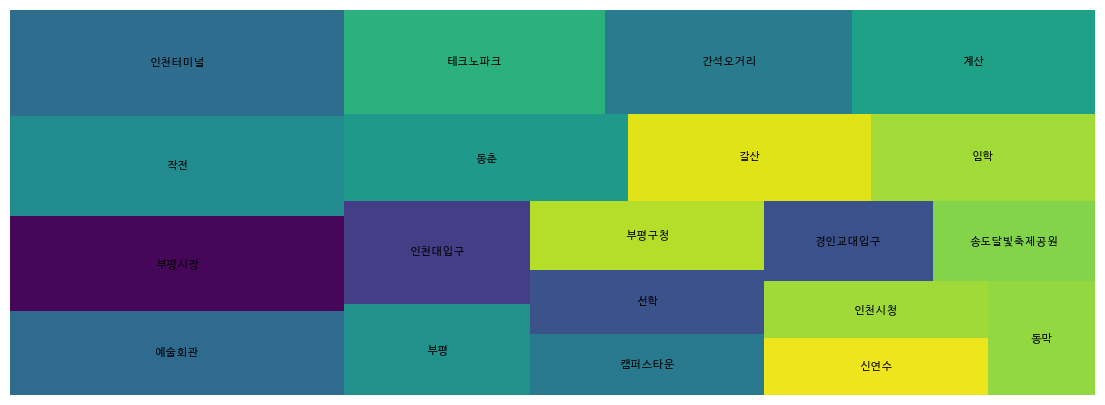

In [14]:
import squarify
plt.figure(figsize=(14,5))
squarify.plot(sizes=sdata['total'].iloc[:20],label=sdata['name'].iloc[:20])
plt.rcParams['font.size'] = 8
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()